<a href="https://colab.research.google.com/github/ranikumari777/CollegeProject-demo/blob/master/Swap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial walks you through how to perform various statistical tests (Z-test, T-test, Chi-square test, and ANOVA) using a university ranking dataset. We will also visualize the results with appropriate plots. This process involves hypothesis testing, which allows you to make data-driven conclusions about the population based on sample data.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/world all university rank and rank score.csv')

# View the first few rows of the dataset
data.head()



,rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
0,1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96.0
1,2,Stanford University,United States,93.4,91.9,100.0,83.5,91.8,98.2
2,3,Harvard University,United States,92.4,95.2,69.8,82.1,93.4,95.0
3,4,"University of California, Berkeley",United States,91.9,95.2,90.6,83.5,92.7,91.1
4,5,University of Cambridge,United Kingdom,91.7,86.6,76.7,95.4,94.6,93.8


In [3]:

# Select numerical columns for analysis
numerical_data = data.select_dtypes(include=np.number)
numerical_data.head()


,rank,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
0,1,94.8,92.2,99.9,89.6,96.5,96.0
1,2,93.4,91.9,100.0,83.5,91.8,98.2
2,3,92.4,95.2,69.8,82.1,93.4,95.0
3,4,91.9,95.2,90.6,83.5,92.7,91.1
4,5,91.7,86.6,76.7,95.4,94.6,93.8


In [5]:
# Define the column of interest
col_name = 'Overall scores'

# Calculate global mean, sample mean, population std deviation, and sample std deviation
global_mean = data[col_name].mean()
sample_mean = data[col_name].mean()
population_std = data[col_name].std()
sample_std = data[col_name].std()
# Calculate sample size
sample_size = len(data[col_name])

print(f"Global Mean: {global_mean}")
print(f"Sample Mean: {sample_mean}")
print(f"Population Standard Deviation: {population_std}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Sample Size: {sample_size}")



Global Mean: 35.6454945054945
Sample Mean: 35.6454945054945
Population Standard Deviation: 16.04142932926222
Sample Standard Deviation: 16.04142932926222
Sample Size: 910


In [6]:
# Calculate Z-score
z_score = (sample_mean - global_mean) / (population_std / np.sqrt(sample_size))
print(f"Z-score: {z_score}")


Z-score: 0.0


In [7]:
# Calculate p-value
p_value = stats.norm.sf(abs(z_score))
print(f"P-value z-score: {p_value}")


P-value z-score: 0.5


In [9]:
# Set significance level (alpha)
alpha = 0.05

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



Fail to reject the null hypothesis


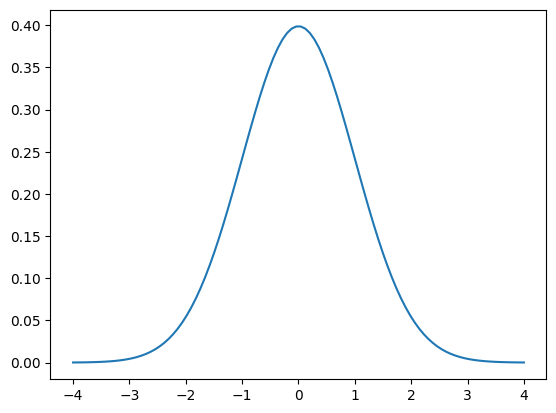

In [10]:
# Z-Score Plot: This shows the distribution of Z-scores and highlights the rejection region based on the significance level.
# Plot Z-score distribution with rejection region
z_range = np.linspace(-4, 4, 100)
z_values = stats.norm.pdf(z_range)

plt.plot(z_range, z_values, label='Z-distribution')


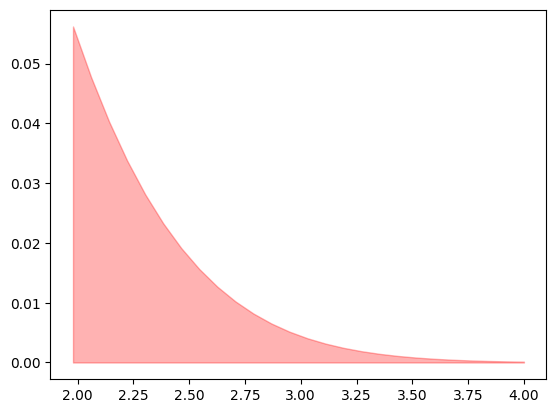

In [11]:
# Shade rejection region
z_critical = stats.norm.ppf(1 - alpha / 2)
plt.fill_between(z_range, z_values, where=(z_range > z_critical), color='red', alpha=0.3, label='Rejection region')


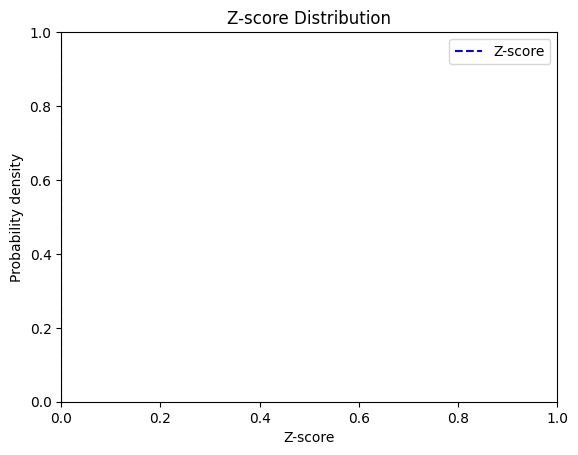

In [12]:
# Mark the Z-score
plt.axvline(x=z_score, color='blue', linestyle='--', label='Z-score')

plt.xlabel('Z-score')
plt.ylabel('Probability density')
plt.title('Z-score Distribution')
plt.legend()
plt.show()


In [14]:
# Grouping data by location (Taiwan and United States)
region1 = 'Taiwan'
region2 = 'United States'
group1 = data[data['location'] == region1][col_name]
group2 = data[data['location'] == region2][col_name]

# Perform T-test
t_statistic, p_value = stats.ttest_ind(group1.dropna(), group2.dropna())
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: -3.6124332702577755
P-value: 0.00040567004655075637


In [15]:
# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


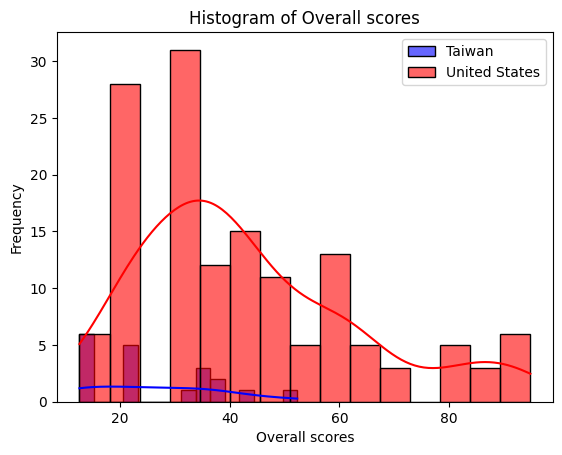

In [16]:
# Visualize the data with histograms
sns.histplot(group1, kde=True, color='blue', label='Taiwan', alpha=0.6, bins=15)
sns.histplot(group2, kde=True, color='red', label='United States', alpha=0.6, bins=15)

plt.xlabel('Overall scores')
plt.ylabel('Frequency')
plt.title('Histogram of Overall scores')
plt.legend()
plt.show()


In [17]:
# Create a contingency table
contingency_table = pd.crosstab(data['location'], data[col_name])

# Perform Chi-square test
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)



Chi-square statistic: 4595.151913816904
P-value: 1.0
Degrees of freedom: 7068
Expected frequencies:
[[3.86191537e+00 7.57238307e+00 3.71046771e+00 ... 3.78619154e-02
  3.78619154e-02 3.78619154e-02]
 [5.67928731e-01 1.11358575e+00 5.45657016e-01 ... 5.56792873e-03
  5.56792873e-03 5.56792873e-03]
 [2.27171492e-01 4.45434298e-01 2.18262806e-01 ... 2.22717149e-03
  2.22717149e-03 2.22717149e-03]
 ...
 [9.31403118e+00 1.82628062e+01 8.94877506e+00 ... 9.13140312e-02
  9.13140312e-02 9.13140312e-02]
 [1.62427617e+01 3.18485523e+01 1.56057906e+01 ... 1.59242762e-01
  1.59242762e-01 1.59242762e-01]
 [4.54342984e-01 8.90868597e-01 4.36525612e-01 ... 4.45434298e-03
  4.45434298e-03 4.45434298e-03]]


In [18]:
# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Fail to reject the null hypothesis


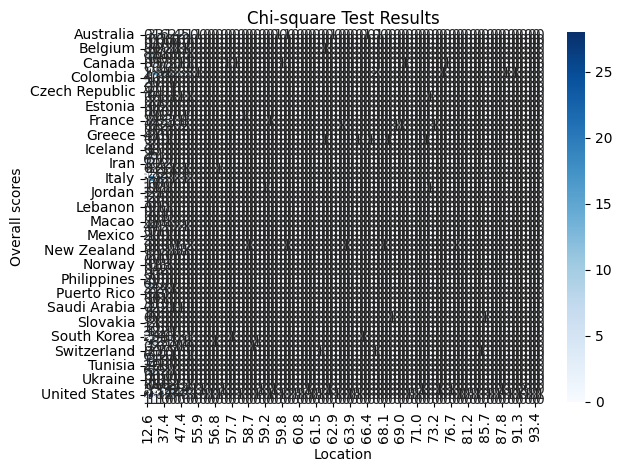

In [19]:
# Visualize the contingency table
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.xlabel('Location')
plt.ylabel('Overall scores')
plt.title('Chi-square Test Results')
plt.show()



In [20]:
# Perform ANOVA
anova_result = stats.f_oneway(*[group[col_name] for name, group in data.groupby('location')])

print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")



F-statistic: 6.0226546602530435
P-value: 7.074382349718592e-42


In [21]:
# Decision based on p-value
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


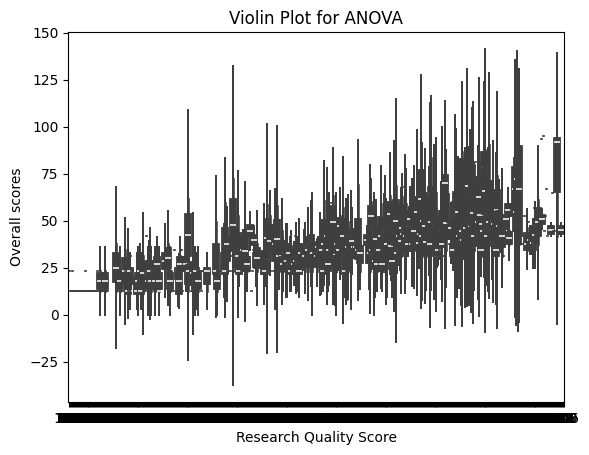

In [22]:
# Visualize the data using a violin plot
sns.violinplot(x='Research Quality Score', y=col_name, data=data)
plt.title('Violin Plot for ANOVA')
plt.show()

